<a name="top"></a>
# Machine Learning Course #
<br>
I put together this Python code to be used in tandem to <a href='https://www.coursera.org/course/ml'> Coursera's Machine Learning Course </a>. This is done to see the inner workings of the concepts in code. 

To submit changes or error fixes, either submit them through <a href='https://github.com/kristineromero/iPython'> Github </a> or email me at <i> kristine.romero2[AT]gmail[DOT]com </i> 

### Resources ###

+ <font size = 2><a href="http://www.holehouse.org/mlclass/">Stanford Machine Learning Class Notes</a></font>

#### Sections ####
+ <a href="#costfunction">Cost and Hypothesis Functions </a>
+ <a href="#gradientdescent"> Gradient Descent</a>
+ <a href="#gradientdescentlm"> Gradient Descent vs Linear Model Function </a>
+ <a href="#multivariate">Multivariate</a>
+ <a href="#featurescaling">Feature Scaling</a>

#### Basic Setup ####

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from operator import sub
import random
from __future__ import division
from sklearn import datasets

In [16]:
%matplotlib inline

# Week 1: Linear Regression #

### Linear Regression Notes ###

+ Linear regression is a supervised learning method because you get a predicted real-value output

### Generating Random Linear Data for Regression ###

+ We generate an x-values and y-values to create a line, and offset the y-values by random integers (-2 to 2) to make an imperfect line for our linear regression. This will be used as our training set for our linear regression model

    + x is simple 0:9
    + y_line is the linear equation of 2x+3 using the x values
    + y_points adds a random integer from -2 to 2 to each of the y_line values to create an imperfect linear relationship between x and y_points
    <br><br>

+ When we plot these values, we can see that they have a linear relationship, but are not formed by an exact equation of a line

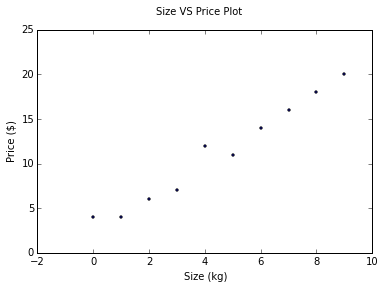

In [118]:
x = range(10)

y_line = [(i * 2) + 3 for i in x] 
y_points = [i + np.random.randint(-2,2) for i in y_line]

fig = plt.figure()
plt.scatter(x, y_points, s=5)
fig.suptitle( 'Size VS Price Plot' )
plt.xlabel( 'Size (kg)' )
plt.ylabel( 'Price ($)' )
plt.show()

### Training Set ###

#### Notation ####
+ m : number of training examples
+ x : input variable (Size)
+ y : output varible (Price)
+ (x,y) : one training example (Size, Price)
+ (x<sup>i</sup>, y<sup>i</sup>) : ith training example (0,3) for i = 1

In [119]:
df = pd.DataFrame(y_points, x)
df.index.names = ['Size']
df.columns = ['Price']
df

,Price
Size,
0,4
1,4
2,6
3,7
4,12
5,11
6,14
7,16
8,18


<a name="costfunction"></a>
### Representing the Hypothesis ###
<a href="#top">Back to top</a>
<br>

Now, using this training data, we will try to find a h (a hypothesis) that maps x values to an estimated value of y
<br>
#### Representing the Hypothesis ####

We use the equation:
<br>
> h<sub>θ</sub>(x) =  θ<sub>0</sub> +  θ<sub>1</sub>x

    θ represents parameters 

This equation is the predicted linear formula between y and x. Because there is only one variable (x) this is a univariate linear regression.

#### Examples of different hypothesis functions ####

#### For Hypothesis Function: 
+ <b>Example 1</b>: θ<sub>0</sub> = 1.5 and θ<sub>1</sub> = 0 , The equation for the hypothesis is h(x) = 1.5 + 0(x) 
+ <b>Example 2</b>: θ<sub>0</sub> = 0 and θ<sub>1</sub> = 0.5 , The equation for the hypothesis is h(x) = 0 + 0.5(x) 
+ <b>Example 3</b>: θ<sub>0</sub> = 1 and θ<sub>1</sub> = 0.5 , The equation for the hypothesis is h(x) = 1 + 0.5(x)
<br>

So the θ<sub>0</sub> always represents the intercept. In this example, it shows what the price would be if the size is 0. θ<sub>1</sub> represents the slope of the line, showing the relationship to price as size increases incrementally. So if θ<sub>1</sub> is 2, for every kg that the size increases, the price will increase by $2. 

In [120]:
x_example = range(4)

In [121]:
y_example_1 = [0*i +1.5 for i in x_example]
y_example_2 = [0.5*i +0 for i in x_example]
y_example_3 = [0.5*i +1 for i in x_example]

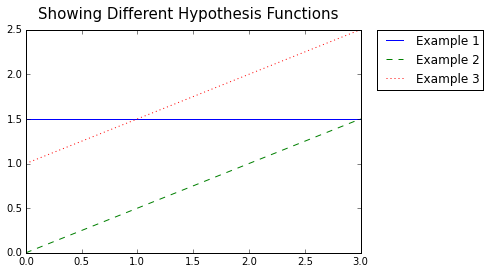

In [122]:
fig = plt.figure()
fig.suptitle( 'Showing Different Hypothesis Functions', size=15 )
plt.plot(x_example, y_example_1, '-', label='Example 1')
plt.plot(x_example, y_example_2, '--', label='Example 2')
plt.plot(x_example, y_example_3, ':', label='Example 3')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Understanding the Cost Function ##

#### The Cost Function ####

The cost function is essentially the average sum of all of the differences between the actual y values (Price) and the predicted  values for price we get with our hypothesis function
<br>

The equation is 1/2m (calculated the average) * sum over all training examples of (predicted y - actual y) ^ 2. You square to get the raw distances, so if the difference between expected y and actual y is 2, or -2 the square of the differences will be the same distance

#### Visualizing the Squared Error Function ####

Calculate the sum of squares, but for visualizing, we don't need the sum, we just visualize the raw the distance to the hypothesis function

In [123]:
df['Price_predicted'] = y_line
df['Distance'] = df.Price_predicted - df.Price
df['Dist_squared'] = [i*i for i in df.Distance]

#### For each set of points in our training data, we plot ####
+ the actual points (shown by the scatter plot)
+ the predicted points (shown by the line)
+ the distance from the actual points from the predicted points, by plotting (x<sub>i</sub>,y<sub>i</sub>) and (x<sub>i</sub>,y<sub>i_predicted</sub>) to show the vertical line between the actual and predicted values representing the distance
+ <b> Each red line represents Expected Price - Actual Price, the squared distance is just square the of this number</b>

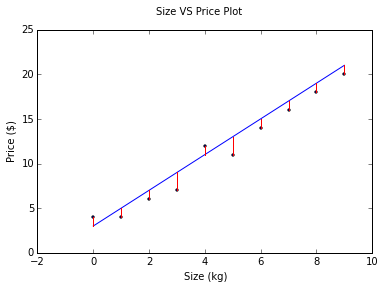

In [124]:
fig = plt.figure()
plt.scatter(df.index, df.Price, s=5)
plt.plot(df.index,df.Price_predicted, label='Hypothesis Function')

for distance in df.iterrows():
    x_vals =  [distance[0] ,distance[0]]
    y_vals = [distance[1].Price, distance[1].Price_predicted]
    sub_df = pd.DataFrame(y_vals,x_vals)
    sub_df.columns = ['y_dist']
    plt.plot(sub_df.index,sub_df.y_dist, color='red' )

fig.suptitle( 'Size VS Price Plot' )
plt.xlabel( 'Size (kg)' )
plt.ylabel( 'Price ($)' )
plt.show()

## Intuition of Hypothesis and Cost Function ##

<b> Hypothesis Function </b> for a fixed θ<sub>1</sub>  is a function of x, meaning θ<sub>1</sub> just represents the multiplier of x eg: y=4x
<br>
<b> Cost Function </b> is function of the parameter  θ<sub>1</sub>

### Visualizing Hypothesis VS Cost Function ###

#### Calculating the Cost Function for θ<sub>1</sub> 0:9 ####
<br>
#### Steps: ####
For each value of θ<sub>1</sub> (potential slopes for the line of best fit)
+ <b> Step 1:</b> calculate the expected price with that slope (size * value of θ<sub>1</sub>)
+ <b> Step 2:</b> calculate the difference from expected price to actual price
+ <b> Step 3:</b> square each difference to get the distance in positive values
+ <b> Step 4:</b> sum the squares of distance (this value is called the square of errors)
+ <b> Step 5:</b> multiple the sum by 1/2*number of training samples

In [125]:
slope_values = range(10) # Represents theta-1 values from 0 to 9

def cost_function(x_values, y_values, slope_values):
    cost_equation = []
    for theta_one_value in slope_values:
        y_predicted = [x_val*theta_one_value for x_val in x_values]
        y_difference =  map(sub, y_predicted, y_values)
        y_sq_diff = [i*i for i in y_difference]
        sum_error = sum(y_sq_diff)
        cost_value = (1/(2*len(x_values))) * sum_error
        cost_equation.append(cost_value)
    return(cost_equation)
        
df_cost_equation = cost_function(df.index, df.Price, slope_values) # Gives us the cost of each potential slope from 0-9

#### Getting Predicted-Y for Plotting Purposes ####

In [126]:
def predict_y(x_values, theta_one_value):
    y_predicted = [x_val*theta_one_value for x_val in x_values]
    return(y_predicted)

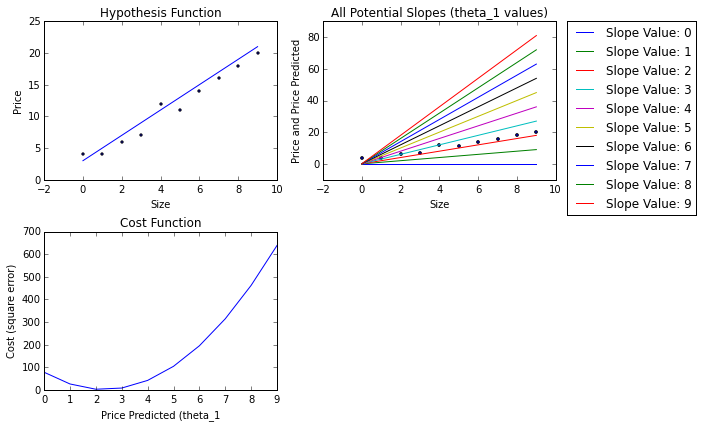

In [127]:
fig = plt.figure(figsize=(8, 6))

# Hypothesis Function

ax1 = fig.add_subplot(2,2,1)
ax1.scatter(df.index, df.Price, s=5)
ax1.set_title( 'Hypothesis Function' )
ax1.set_xlabel('Size')
ax1.set_ylabel('Price')

ax1.plot(df.index,df.Price_predicted)

# All potential slopes

ax2 = fig.add_subplot(2,2,2)
ax2.set_title( 'All Potential Slopes (theta_1 values)' )
ax2.scatter(df.index, df.Price, s=7)
for value in slope_values:
    y_new = predict_y(df.index, value)
    line_label = 'Slope Value: ' + str(value)
    ax2.plot(df.index,y_new, label=line_label)
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax2.set_xlabel('Size')
ax2.set_ylabel('Price and Price Predicted')

# Cost Function

ax3 = fig.add_subplot(2,2,3)
ax3.set_title( 'Cost Function' )
ax3.plot(df.index,df_cost_equation, label='Cost Function')
ax3.set_xlabel('Price Predicted (theta_1')
ax3.set_ylabel('Cost (square error)')
plt.tight_layout()
plt.show()

### Interpretting the Graphs ###

We loop through the potential slopes to see which one creates the least error between the actual y values and the predicted y values created from the slope. From the <i> All Potential Slopes</i> graph, we can see that the ideal slope should be somewhere around 2 and 3. 
<br><br>
The <i> Cost Function </i> graph confirms this by showing that the slope with the smallest error occurs somewhere around 2 and 3.
<br><br>
So now we can understand that if we minimize the cost function, we can find the ideal slope

## Adding in θ<sub>0</sub> as the Intercept in the Hypothesis Equation ##

In [128]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.cm as cm

#### Altering the Cost Function for theta_1 (slope) and theta_0 (intercept) ####

In [129]:
slope_values = np.arange(-5,5,0.5)       # Represents theta_1 values from 0 to 9
intercept_values = np.arange(-5,5,0.5)   # Represents theta_0 values from 0 to 9
                         
def cost_function(x_values, y_values, slope_values, intercept_values):
    cost_equation = []
    for theta_one_value in slope_values:
        for theta_zero_value in intercept_values:
            y_predicted = [(x_val*theta_one_value) + theta_zero_value for x_val in x_values]
            y_difference =  map(sub, y_predicted, y_values)
            y_sq_diff = [i*i for i in y_difference]
            sum_error = sum(y_sq_diff)
            cost_value = (1/(2*len(x_values))) * sum_error
            cost_equation.append((theta_one_value,theta_zero_value,cost_value))
    return(cost_equation)
        
df_cost_equation = cost_function(df.index, df.Price, slope_values,intercept_values)
theta_one = [values[0] for values in df_cost_equation]
theta_zero = [values[1] for values in df_cost_equation]
cost_value = [values[2] for values in df_cost_equation]

theta_one,theta_zero  = np.meshgrid(theta_one, theta_zero)


#### Plotting the Cost Function of theta_1 and theta_0 ####
Note: The shape of this function is "bow shaped" which is always the case for linear functions

<matplotlib.colorbar.Colorbar instance at 0x11085d098>

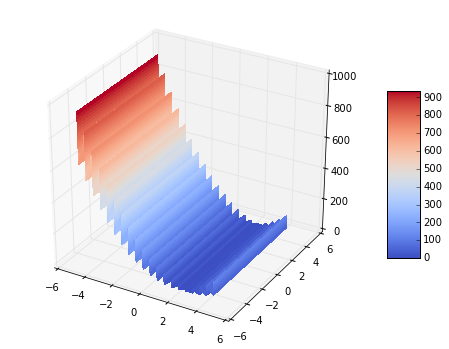

In [130]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection='3d')

surf = ax.plot_surface(theta_one, theta_zero,cost_value, rstride=1, cstride=1, cmap=plt.cm.coolwarm,
         linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)

<a name="gradientdescent"></a>
## Gradient Descent for Linear Regression ##
<a href="#top">Back to top</a>

<b> Intuition: </b> The derivative of the cost function for gradient descent will be equal to the derivative of the sum of squares forumal for a linear regression.
<br>
<b>Equation: </b>partial derivative ((1/2m) * (sum(θ<sub>0</sub> + θ<sub>1</sub>x<sup>(i)</sup> - y<sup>(i)</sup>)^2)) for observations (i)
<br>
<b> Partial Derivatives for θ<sub>0</sub> and θ<sub>1</sub> : </b>
<br>
> <b>θ<sub>0</sub></b>: j=0 : derivative (1/m * (sum(expected(y<sup>(i)</sup>)- actual( y <sup>(i)</sup>)))
<br>
> <b>θ<sub>1</sub></b>: j=1 : derivative (1/m * (sum(expected(y<sup>(i)</sup>)- actual (y <sup>(i)</sup>))*x<sup>(i)</sup>))
<br>

So, the gradient descent algorithm for linear regression will use a learning parameter α to take steps along the cost function for each variable until convergence on a local minimum of the cost curve for each variable.

### Example ###
<br>
We know the ideal equation for our example line is:
> y =  2x + 3 
<br>

Now we will use gradient descent to converge on θ<sub>0</sub> = 3 and θ<sub>1</sub> = 2.
We'll use 0.1 as our learning increment

<font size = 1><a href="http://spin.atomicobject.com/2014/06/24/gradient-descent-linear-regression/">source for stepGradient</a></font>

### Visualizing the Steps of Linear Regression Gradient Descent ###

#### Setting up what we need for gradient descent of our data frame ####
Remember - this data is derived from the base line y = 2x + 3 with random numbers between -2 and 2 added to it

In [131]:
## Setup Data
x_vals = list(df.index)
y_vals = list(df.Price)

## Set Start Line (mx + b)
m_current = -1
b_current = 0

## Set Learning Rate
learningRate = 0.01

## Set N
N = float(len(x_vals))

#### Getting the first gradient for starting slope and intercept ####

In [132]:
b_gradient = (-2/N) * sum([y_vals[i] - (m_current*x_vals[i] + b_current) for i in range(len(x_vals))])
m_gradient = (-2/N) * sum([(y_vals[i] - (m_current*x_vals[i] + b_current)) * x_vals[i] for i in range(len(x_vals))])

#### Find the next step from the learning rate and the gradient at the starting point ####
<b>Intuition:</b> if the absolute value of the gradient is big, then the current value will be changed alot, if the absolute value of the gradient is small, the current value of m and b will change very little until it converges, or the new value for m and b is equal to the old value of m and b

In [133]:
new_b1 = b_current - (learningRate * b_gradient)
new_m1 = m_current - (learningRate * m_gradient)

#### Manually interate this process a couple of times to see how it works ####

In [134]:
# Step 2

b_gradient1 = (-2/N) * sum([y_vals[i] - (new_m1*x_vals[i] + new_b1) for i in range(len(x_vals))])
m_gradient1 = (-2/N) * sum([(y_vals[i] - (new_m1*x_vals[i] + new_b1)) * x_vals[i] for i in range(len(x_vals))])

new_b2 = new_b1 - (learningRate * b_gradient1)
new_m2 = new_m1 - (learningRate * m_gradient1)


## Step 3

b_gradient2 = (-2/N) * sum([y_vals[i] - (new_m2*x_vals[i] + new_b2) for i in range(len(x_vals))])
m_gradient2 = (-2/N) * sum([(y_vals[i] - (new_m2*x_vals[i] + new_b2)) * x_vals[i] for i in range(len(x_vals))])

new_b3 = new_b2 - (learningRate * b_gradient2)
new_m3 = new_m2 - (learningRate * m_gradient2)


## Step 4
b_gradient3 = (-2/N) * sum([y_vals[i] - (new_m3*x_vals[i] + new_b3) for i in range(len(x_vals))])
m_gradient3 = (-2/N) * sum([(y_vals[i] - (new_m3*x_vals[i] + new_b3)) * x_vals[i] for i in range(len(x_vals))])

new_b4 = new_b3 - (learningRate * b_gradient3)
new_m4 = new_m3 - (learningRate * m_gradient3)


## Step 5
b_gradient4 = (-2/N) * sum([y_vals[i] - (new_m4*x_vals[i] + new_b4) for i in range(len(x_vals))])
m_gradient4 = (-2/N) * sum([(y_vals[i] - (new_m4*x_vals[i] + new_b4)) * x_vals[i] for i in range(len(x_vals))])

new_b5 = new_b4 - (learningRate * b_gradient4)
new_m5 = new_m4 - (learningRate * m_gradient4)

#### Now we can visualize each step of the gradient descent ####

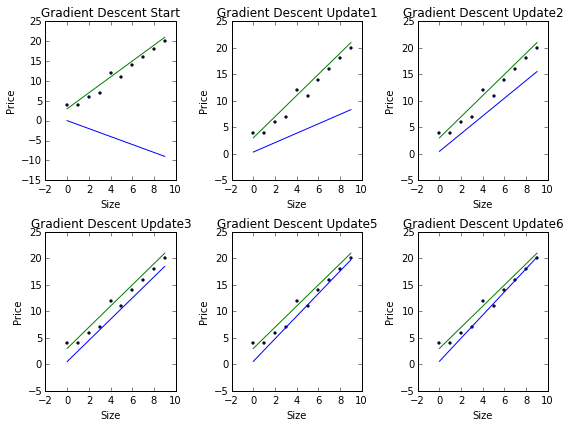

In [135]:
fig = plt.figure(figsize=(8, 6))

real_line = [2*i + 3 for i in x_vals]
# Start Gradient Descent
gd1 = [m_current*i + b_current for i in x_vals]
ax1 = fig.add_subplot(2,3,1)
ax1.scatter(df.index, df.Price, s=5)
ax1.plot(df.index,gd1)
ax1.plot(df.index,real_line)
ax1.set_title( 'Gradient Descent Start' )
ax1.set_xlabel('Size')
ax1.set_ylabel('Price')


# Gradient Descent Step 1

ax2 = fig.add_subplot(2,3,2)
gd2 = [new_m1*i + new_b1 for i in x_vals]
ax2.scatter(df.index,df.Price , s=5)
ax2.plot(df.index, gd2, label=line_label)
ax2.plot(df.index,real_line)
ax2.set_title( 'Gradient Descent Update1' )
ax2.set_xlabel('Size')
ax2.set_ylabel('Price')

# Gradient Descent Step 2

ax3 = fig.add_subplot(2,3,3)
gd3 = [new_m2*i + new_b2 for i in x_vals]
ax3.scatter(df.index,df.Price , s=5)
ax3.plot(df.index, gd3)
ax3.plot(df.index,real_line)
ax3.set_title( 'Gradient Descent Update2' )
ax3.set_xlabel('Size')
ax3.set_ylabel('Price')

# Gradient Descent Step 3
ax4 = fig.add_subplot(2,3,4)
gd4 = [new_m3*i + new_b3 for i in x_vals]
ax4.scatter(df.index,df.Price , s=5)
ax4.plot(df.index, gd4)
ax4.plot(df.index,real_line)
ax4.set_title( 'Gradient Descent Update3' )
ax4.set_xlabel('Size')
ax4.set_ylabel('Price')


# Gradient Descent Step 4
ax5 = fig.add_subplot(2,3,5)
gd5 = [new_m4*i + new_b4 for i in x_vals]
ax5.scatter(df.index,df.Price , s=5)
ax5.plot(df.index, gd5)
ax5.plot(df.index,real_line)
ax5.set_title( 'Gradient Descent Update5' )
ax5.set_xlabel('Size')
ax5.set_ylabel('Price')


# Gradient Descent Step 5
ax6 = fig.add_subplot(2,3,6)
gd6 = [new_m5*i + new_b5 for i in x_vals]
ax6.scatter(df.index,df.Price , s=5)
ax6.plot(df.index, gd6)
ax6.plot(df.index,real_line)
ax6.set_title( 'Gradient Descent Update6' )
ax6.set_xlabel('Size')
ax6.set_ylabel('Price')


plt.tight_layout()
plt.show()

#### Turn the manual iteration into a function ###

In [10]:
def stepGradient(x_vals, y_vals, learning_rate, m_val, b_val):
    N = float(len(x_vals))
    
    ## Update the gradient for slope and intercept values
    b_gradient = (-2/N) * sum([y_vals[i] - (m_val*x_vals[i] + b_val) for i in range(len(x_vals))])
    m_gradient = (-2/N) * sum([(y_vals[i] - (m_val*x_vals[i] + b_val)) * x_vals[i] for i in range(len(x_vals))])

    # Find the next step from the learning rate and the gradient at the starting point
    new_b = b_val - (learning_rate * b_gradient)
    new_m = m_val - (learning_rate * m_gradient)
    return(new_b, new_m)

#### Do the same iteration 2000x ####

In [137]:
m_val = -1
b_val = 0
learning_rate = 0.005
all_m_vals = [] # Gives all values of the slope through all iterations
all_b_vals = [] # Gives all values of the intercept through all iterations

for i in range(2000):
    all_m_vals.append(m_val)
    all_b_vals.append(b_val)
    takeStep = stepGradient(x_vals, y_vals, learning_rate, m_val, b_val)
    m_val = takeStep[1]
    b_val = takeStep[0]

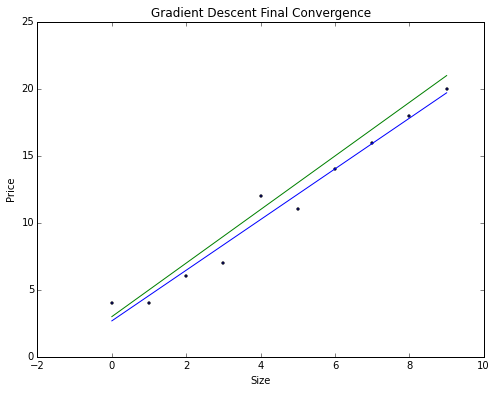

In [138]:
fig = plt.figure(figsize=(8, 6))

real_line = [2*i + 3 for i in x_vals]

# Gradient Descent Convergence
gd_it = [m_val*i + b_val for i in x_vals]
ax1 = fig.add_subplot(1,1,1)
ax1.scatter(df.index, df.Price, s=5)
ax1.plot(df.index,gd_it)
ax1.plot(df.index,real_line)
ax1.set_title( 'Gradient Descent Final Convergence' )
ax1.set_xlabel('Size')
ax1.set_ylabel('Price')

### Moving Pieces ###

There's a lot of moving pieces and questions here
+ What is the right learning rate?
+ Why does the gradient descent line not converge on our expected line?
+ How many iterrations are necessary? How do you know when to stop?
+ What if we compare our results against a linear regression function?

#### Gradient Descent with Different Learning Rates ####

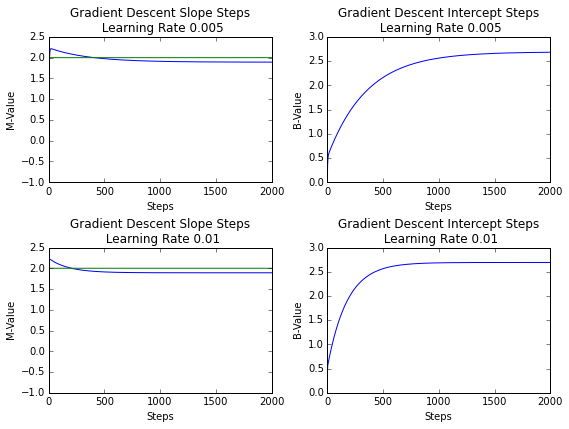

In [139]:
m_val = -1
b_val = 0
learning_rate = 0.005
all_m_vals_005 = [] # Gives all values of the slope through all iterations
all_b_vals_005 = [] # Gives all values of the intercept through all iterations

for i in range(2000):
    all_m_vals_005.append(m_val)
    all_b_vals_005.append(b_val)
    takeStep = stepGradient(x_vals, y_vals, learning_rate, m_val, b_val)
    m_val = takeStep[1]
    b_val = takeStep[0]


learning_rate = 0.01
m_val = -1
b_val = 0
all_m_vals_01 = [] # Gives all values of the slope through all iterations
all_b_vals_01 = [] # Gives all values of the intercept through all iterations

for i in range(2000):
    all_m_vals_01.append(m_val)
    all_b_vals_01.append(b_val)
    takeStep = stepGradient(x_vals, y_vals, learning_rate, m_val, b_val)
    m_val = takeStep[1]
    b_val = takeStep[0]

fig = plt.figure(figsize=(8, 6))


# Gradient Descent Slope Steps - Learning Rate 0.005
ax1 = fig.add_subplot(2,2,1)
ax1.plot(range(2000),all_m_vals_005)
ax1.plot(range(2000),np.repeat(2,2000))
ax1.set_title( 'Gradient Descent Slope Steps \n Learning Rate 0.005' )
ax1.set_xlabel('Steps')
ax1.set_ylabel('M-Value')


# Gradient Descent Intercept Steps - Learning Rate 0.005

ax2 = fig.add_subplot(2,2,2)
ax2.plot(range(2000),all_b_vals_005)
ax2.plot(range(2000),np.repeat(3,2000))
ax2.set_title( 'Gradient Descent Intercept Steps \n Learning Rate 0.005' )
ax2.set_xlabel('Steps')
ax2.set_ylabel('B-Value')


# Gradient Descent Slope Steps - Learning Rate 0.01
ax3 = fig.add_subplot(2,2,3)
ax3.plot(range(2000),all_m_vals_01)
ax3.plot(range(2000),np.repeat(2,2000))
ax3.set_title( 'Gradient Descent Slope Steps \n Learning Rate 0.01' )
ax3.set_xlabel('Steps')
ax3.set_ylabel('M-Value')

# Gradient Descent Intercept Steps - Learning Rate 0.01

ax4 = fig.add_subplot(2,2,4)
ax4.plot(range(2000),all_b_vals_01)
ax4.plot(range(2000),np.repeat(3,2000))
ax4.set_title( 'Gradient Descent Intercept Steps \n Learning Rate 0.01' )
ax4.set_xlabel('Steps')
ax4.set_ylabel('B-Value')



plt.tight_layout()
plt.show()

#### Gradient Descent on a Perfect Line - will it converge? ####

Because the gradient descent did not converge perfectly to our expected line (2x+3), we can check if the gradient descent line is actually a better fit by running gradient descent on perfect linear data to see if the actual line and the gradient descent line converge to the same line

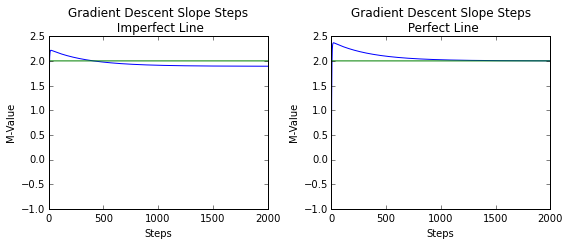

In [140]:
m_val = -1
b_val = 0
learning_rate = 0.005
y_vals_line = [2*i + 3 for i in x_vals]
all_m_vals_line = [] # Gives all values of the slope through all iterations
all_b_vals_line = [] # Gives all values of the intercept through all iterations

for i in range(2000):
    all_m_vals_line.append(m_val)
    all_b_vals_line.append(b_val)
    takeStep = stepGradient(x_vals, y_vals_line, learning_rate, m_val, b_val)
    m_val = takeStep[1]
    b_val = takeStep[0]

fig = plt.figure(figsize=(8, 6))


# Gradient Descent Slope Steps - Learning Rate 0.005
ax1 = fig.add_subplot(2,2,1)
ax1.plot(range(2000),all_m_vals_005)
ax1.plot(range(2000),np.repeat(2,2000))
ax1.set_title( 'Gradient Descent Slope Steps \n Imperfect Line' )
ax1.set_xlabel('Steps')
ax1.set_ylabel('M-Value')


# Gradient Descent Slope Steps - Learning Rate 0.005

ax2 = fig.add_subplot(2,2,2)
ax2.plot(range(2000),all_m_vals_line)
ax2.plot(range(2000),np.repeat(2,2000))
ax2.set_title( 'Gradient Descent Slope Steps \n Perfect Line' )
ax2.set_xlabel('Steps')
ax2.set_ylabel('M-Value')


plt.tight_layout()
plt.show()

<a name="gradientdescentlm"></a>
## Comparing Against a Linear Regression Model ##
<a href="#top">Back to top</a>

To get a bit further understanding on this model, and opening the doors for multivariate linear regression, lets repeat the univariate gradient descent on the Boston housing data set.


#### Boston Housing Data Set ####

Boston data set gives us the median housing prices for different areas and several variables describing those areas. For our purposes, we will subset this dataset to look at the following variables.

- <b>nox</b>:       nitric oxides concentration (parts per 10 million) (pollution variable)
- <b>rm</b>:       average number of rooms per dwelling (size variable)
- <b>age</b>:      proportion of owner-occupied units built prior to 1940 (age variable)
- <b>med_val</b>:  median value of house in $1000's (dependent variable)

#### Load in the Boston dataset ####

In [200]:
from sklearn import datasets

def get_boston_data():
    bt = datasets.load_boston()['data']
    bt_val = datasets.load_boston()['target']
    bt_names = datasets.load_boston()['feature_names']
    bt_df = pd.DataFrame(bt)
    bt_df.columns = bt_names
    bt_df = bt_df.ix[:,['NOX', 'RM', 'AGE']]
    bt_df.columns = ['nox', 'rm', 'age']
    bt_df['med_val'] = list(bt_val)
    return bt_df

In [201]:
bt_df = get_boston_data()
bt_df.head()

,nox,rm,age,med_val
0,0.538,6.575,65.2,24.0
1,0.469,6.421,78.9,21.6
2,0.469,7.185,61.1,34.7
3,0.458,6.998,45.8,33.4
4,0.458,7.147,54.2,36.2


#### Plot Pollution against House Price to see Linear Relationship ####

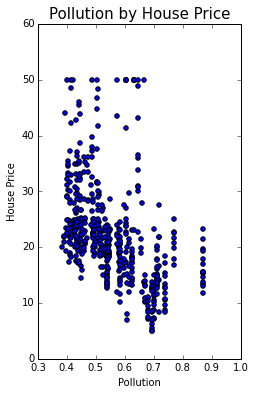

In [18]:
fig = plt.figure(figsize=(8, 6))

ax1 = fig.add_subplot(1,2,1)
ax1.scatter(bt_df['nox'] ,bt_df['med_val'])
ax1.set_title( 'Pollution by House Price', fontsize=15 )
ax1.set_xlabel('Pollution')
ax1.set_ylabel('House Price')

#### Using a linear regression model to calculate the linear relationship - using ordinary least squares ####

In [19]:
import statsmodels.formula.api as sm
fit = sm.ols(formula="med_val ~ nox", data=bt_df).fit()
lm_intercept = fit.params.Intercept
lm_slope = fit.params.nox
fit.params

Intercept    41.345874
nox         -33.916055
dtype: float64

#### Now using gradient descent to calculate the same parameters ####
To be consistent, we will stick with the same settings, we started with in the previous model, i.e. 2000 iterations with a learning rate of 0.005

In [20]:
m_val = -1
b_val = 0
learning_rate = 0.005
x_vals = bt_df.loc[:,'nox'].values.T
y_vals = bt_df.loc[:,'med_val'].values.T
all_m_vals = []
all_b_vals = []

for i in range(2000):
    all_m_vals.append(m_val)
    all_b_vals.append(b_val)
    takeStep = stepGradient(x_vals, y_vals, learning_rate, m_val, b_val)
    m_val = takeStep[1]
    b_val = takeStep[0]

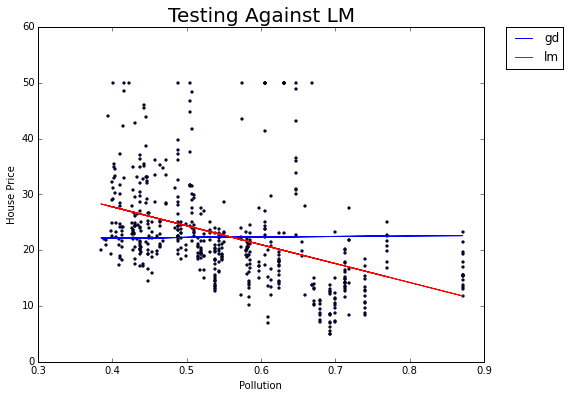

In [21]:
gd_line = [(m_val*x)+b_val for x in x_vals]
lm_line = [(lm_slope*x)+lm_intercept for x in x_vals]

# Graphing LM vs Gradient Descent
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(1,1,1)
ax1.scatter(x_vals, y_vals, s=5)
ax1.plot(x_vals,gd_line, label='gd', color='blue')
ax1.plot(x_vals,lm_line, label='lm', color='red')
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax1.set_title( 'Testing Against LM',fontsize=20 )
ax1.set_xlabel('Pollution')
ax1.set_ylabel('House Price')

#### What is going on? ####

Clearly, the gradient descent is underperforming. We can take some steps to gain some insight.
<br>
+ <b> Error Function: </b> We can build an error function to tell us the sum of squares error at each iteration to see if this gives us some insight into the under performance.
+ <b> Increase Iteration: </b> We can tell the algorithm to run more iterations in hope of getting closer to the actual value
+ <b> Change Learning Rate: </b> We can increase the learning rate for the algorithm to take slightly larger steps, landing on a more accurate value more quickly. We do run the risk of over-shooting the correct value if our learning rate is too high
+ <b> % Change in Parameters: </b> We can see by what % the paramter is changing to see if each step is making a relatively large change to the parameter
+ <b> slope values compared to LM value: </b> To the see the actual performance of the algorithm, we can monitor the slope values for each iteration against the predicted LM value. 



In [22]:
def gradientDescent(x_vals, y_vals, learning_rate, m_val, b_val, iterations):
    N = float(len(x_vals))
    sum_sq_error = [] # sum of squares for each iteration
    sq_error_min = []
    b_change = [] # change in intercept values at each iteration
    m_change = [] # change in slope values at each iterations
    all_b_vals = [] # actual intercept values for each iteration
    all_m_vals = [] # actual slope values for each iteration
    
    for i in range(iterations):
    ## Adding in the sum of square error function to get sum of squares for each step of slope and intercept values
        sq_error_min_it = min([(y_vals[i] - (m_val*x_vals[i] + b_val))**2 for i in range(len(x_vals))])
        sq_error_min.append(sq_error_min_it)
        sum_sq_error_it = sum([(y_vals[i] - (m_val*x_vals[i] + b_val))**2 for i in range(len(x_vals))]) 
        sum_sq_error.append(sum_sq_error_it)
    ## Update the gradient for slope and intercept values
        b_gradient = (-2/N) * sum([y_vals[i] - (m_val*x_vals[i] + b_val) for i in range(len(x_vals))])
        m_gradient = (-2/N) * sum([(y_vals[i] - (m_val*x_vals[i] + b_val)) * x_vals[i] for i in range(len(x_vals))])
    ## Checking % change in old values and new values
        b_new = b_val - (learning_rate * b_gradient)
        m_new = m_val - (learning_rate * m_gradient)
        b_perc_change = (b_new-b_val)/b_val
        m_perc_change = (m_new-m_val)/m_val
        b_change.append(b_perc_change)
        m_change.append(m_perc_change)
    ## Find the next step from the learning rate and the gradient at the starting point
        all_b_vals.append(b_val)
        all_m_vals.append(m_val)
        b_val = b_new
        m_val = m_new
    return({'m_val':m_val, 
            'b_val': b_val, 
            'sq_error_min' : sq_error_min,
            'sum_sq_error':sum_sq_error, 
            'b_change' : b_change,
            'm_change' : m_change,
            'all_b_vals' : all_b_vals,
            'all_m_vals' : all_m_vals})

In [23]:
m_val = -1
b_val = 0
learning_rate1 = 0.025
learning_rate2 = 0.005
x_vals = bt_df.loc[:,'nox'].values.T
y_vals = bt_df.loc[:,'med_val'].values.T

bt_gd_10k_lr1 = gradientDescent(x_vals, y_vals, learning_rate1, m_val, b_val, 10000)
bt_gd_10k_lr2 = gradientDescent(x_vals, y_vals, learning_rate2, m_val, b_val, 10000)

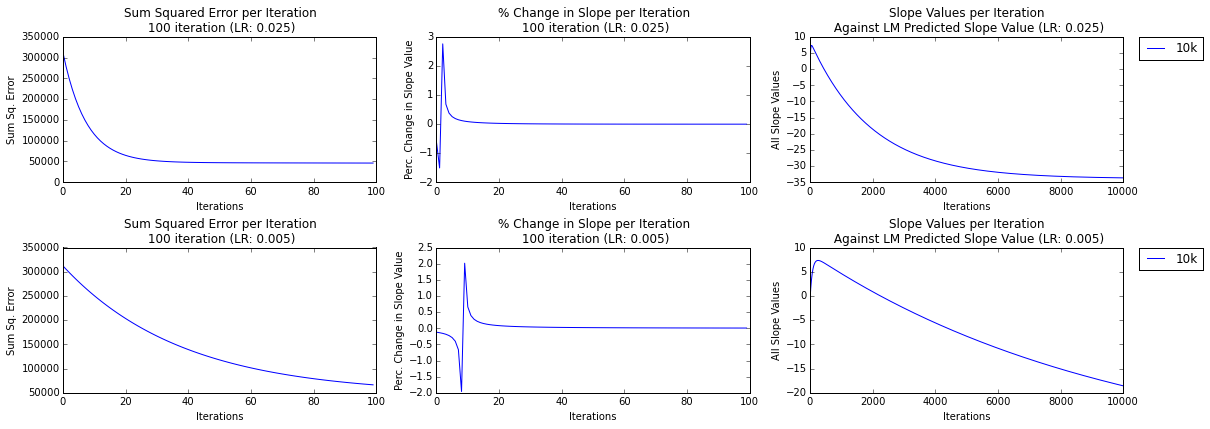

In [24]:
# Gradient Descent Convergence
fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(2,3,1)
ax1.plot(range(100),bt_gd_10k_lr1['sum_sq_error'][0:100], label='sum_sq', color='blue')
ax1.set_title( 'Sum Squared Error per Iteration \n 100 iteration (LR: 0.025)' )
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Sum Sq. Error')

ax2 = fig.add_subplot(2,3,2)
ax2.plot(range(100),bt_gd_10k_lr1['m_change'][0:100], label='perc_change', color='blue')
ax2.set_title( '% Change in Slope per Iteration \n 100 iteration (LR: 0.025)' )
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Perc. Change in Slope Value')

ax3 = fig.add_subplot(2,3,3)
ax3.plot(range(10000),bt_gd_10k_lr1['all_m_vals'], label='10k', color='blue')
#ax3.plot(range(10000),np.repeat(lm_slope, 10000), label='lm', color='red')
ax3.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax3.set_title( 'Slope Values per Iteration \n Against LM Predicted Slope Value (LR: 0.025)' )
ax3.set_xlabel('Iterations')
ax3.set_ylabel('All Slope Values') 
 
ax4 = fig.add_subplot(2,3,4)
ax4.plot(range(100),bt_gd_10k_lr2['sum_sq_error'][0:100], label='sum_sq', color='blue')
ax4.set_title( 'Sum Squared Error per Iteration \n 100 iteration (LR: 0.005)' )
ax4.set_xlabel('Iterations')
ax4.set_ylabel('Sum Sq. Error')

ax5 = fig.add_subplot(2,3,5)
ax5.plot(range(100),bt_gd_10k_lr2['m_change'][0:100], label='perc_change', color='blue')
ax5.set_title( '% Change in Slope per Iteration \n 100 iteration (LR: 0.005)' )
ax5.set_xlabel('Iterations')
ax5.set_ylabel('Perc. Change in Slope Value')

ax6 = fig.add_subplot(2,3,6)
ax6.plot(range(10000),bt_gd_10k_lr2['all_m_vals'], label='10k', color='blue')
#ax6.plot(range(10000),np.repeat(lm_slope, 10000), label='lm', color='red')
ax6.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax6.set_title( 'Slope Values per Iteration \n Against LM Predicted Slope Value (LR: 0.005)' )
ax6.set_xlabel('Iterations')
ax6.set_ylabel('All Slope Values') 
     
    
plt.tight_layout()    

plt.show()

#### What is going on? ####

The number of iterations needed to be increased, and the learning rate could be increased as well to give us a faster, more accurate result. 

<a name="multivariate"></a>
# Linear Regression With Multiple Variables #
<a href="#top">Back to top</a>

<b> Notation: </b>
<br>
n = number of features or variables <p>
N = number of observations <p>
x<sup>(i)</sup>: input (features) of i<sup>th</sup> training example (x<sup>(2)</sup> = [40,3,2,1416])<p>
x<sup>(i)</sup><sub>j</sub>: value of feature j in the i<sup>th</sup> training example (x<sup>(2)</sup><sub>3</sub> = [2])


Moving forward, we can continue to use the Boston dataset for multivariate linear regression.

#### Looking at the linear relationship between x-values and y ####

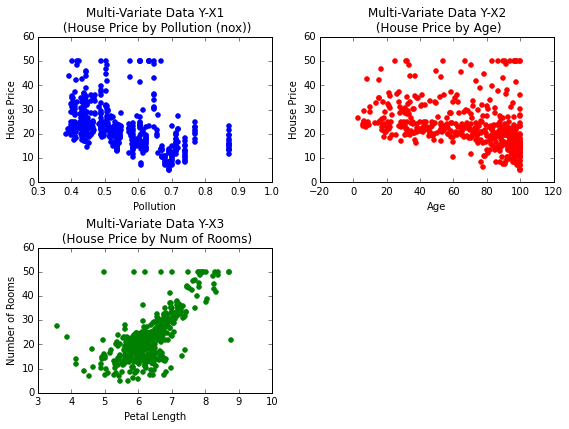

In [89]:
fig = plt.figure(figsize=(8, 6))

nox = bt_df.loc[:,'nox'].values.T
med_val = bt_df.loc[:,'med_val'].values.T
age = bt_df.loc[:,'age'].values.T
rm = bt_df.loc[:,'rm'].values.T

# New Data - x1 Pollution
ax1 = fig.add_subplot(2,2,1)
ax1.scatter(nox ,med_val, color='blue')
ax1.set_title( 'Multi-Variate Data Y-X1 \n (House Price by Pollution (nox))' )
ax1.set_xlabel('Pollution')
ax1.set_ylabel('House Price')


# New Data - x2 Age
ax2 = fig.add_subplot(2,2,2)
ax2.scatter(age ,med_val, color='red')
ax2.set_title( 'Multi-Variate Data Y-X2 \n (House Price by Age)' )
ax2.set_xlabel('Age')
ax2.set_ylabel('House Price')


# New Data - x3 Rooms
ax3 = fig.add_subplot(2,2,3)
ax3.scatter(rm ,med_val, color='green')
ax3.set_title( 'Multi-Variate Data Y-X3 \n (House Price by Num of Rooms)' )
ax3.set_xlabel('Petal Length')
ax3.set_ylabel('Number of Rooms')

plt.tight_layout()
plt.show()

We can use gradient descent to find the best equation for:

<b>m1</b>(<i>Pollution</i>) + <b>m2</b>(<i>Age</i>) + <b>m3</b>(<i>Num Rooms</i>) + <b>b</b> = <i>House Price</i>

where m values are the slope and b is the intercept.

#### The Intuition  of Multivariate Gradient Descent ####

Before we start using vectors, we can do the gradient descent in the same format we did for the univariate linear regression. We update our expected y formula to use all of the variables, and calculate the error across all observations of x and y. 

In [26]:
def stepGradientMV(params,x1_vals, x2_vals, x3_vals, y_vals, learning_rate):
    b_val,m1_val,m2_val, m3_val = params
    
    N = float(len(x1_vals))

    ## Use our parameters to calculate expected y and subtract the actual y for each set of x1,x2,x3,b - y sets
    ## To simplify in later steps, we assume x0 is always = 1, which allows us to find our intercept value -> b
    error_y = [(1*b_val + x1_vals[i]*m1_val + x2_vals[i]*m2_val + x3_vals[i]*m3_val) - y_vals[i]  for i in range(len(x1_vals))]
    
    ## Calculate the differential equation for each slope value
    
    m1_gradient = (1/N) * sum([error_y[i]*x1_vals[i] for i in range(len(x1_vals))])
    m2_gradient = (1/N) * sum([error_y[i]*x2_vals[i] for i in range(len(x2_vals))])
    m3_gradient = (1/N) * sum([error_y[i]*x3_vals[i] for i in range(len(x3_vals))])
    b_gradient = (1/N) * sum(error_y)
    
    ## Update all of the parameter values with the learning rate and gradient

    new_b = b_val - (learning_rate * b_gradient)
    new_m1 = m1_val - (learning_rate * m1_gradient)
    new_m2 = m2_val - (learning_rate * m2_gradient)
    new_m3 = m3_val - (learning_rate * m3_gradient)

    return[new_b, new_m1, new_m2, new_m3]

In [68]:
x1_vals = nox
x2_vals = age
x3_vals = rm
y_vals  = med_val


params = [0,0,0,0]
learning_rate = 0.00032
all_m1_vals=[]
all_m2_vals=[]
all_m3_vals=[]
all_b_vals=[]

for u in range(1000000):   
    takeStep = stepGradientMV(params, x1_vals,x2_vals, x3_vals, y_vals, learning_rate)
    params = takeStep

In [69]:
params

[-18.215108477100227,
 -13.012355668012834,
 -0.036321747086858792,
 8.0294697102364161]

In [84]:
import statsmodels.formula.api as sm
fit_mv = sm.ols(formula="med_val ~ nox + age + rm", data=bt_df).fit()
fit_mv.params


Intercept   -19.083080
nox         -12.478766
age          -0.036857
rm            8.125418
dtype: float64

#### Results : Plotting our gradient descent lines ####
The lm model and our gradient descent function gave us very similar values for the slopes and intercept. We can plot the lines to see the relationship with the data

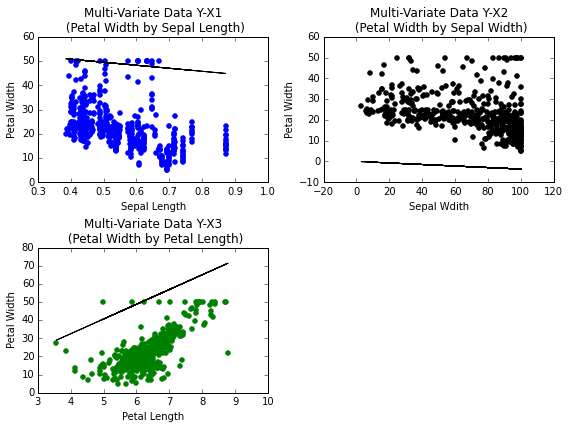

In [87]:
fig = plt.figure(figsize=(8, 6))

x1_vals = nox
x2_vals = age
x3_vals = rm
y_vals  = med_val

nox_vals = [(fit_mv.params.nox*x) for x in x1_vals]
age_vals = [(fit_mv.params.age*x)  for x in x2_vals]
rm_vals = [(fit_mv.params.rm*x) for x in x3_vals]


# # New Data - x1 (Sepal Length)
ax1 = fig.add_subplot(2,2,1)
ax1.scatter(nox ,med_val, color='blue')
ax1.plot(nox,nox_vals, label='gd line', color='black')
ax1.set_title( 'Multi-Variate Data Y-X1 \n (Petal Width by Sepal Length)' )
ax1.set_xlabel('Sepal Length')
ax1.set_ylabel('Petal Width')


# New Data - x2 (Sepal Width)
ax2 = fig.add_subplot(2,2,2)
ax2.scatter(age ,med_val, color='black')
ax2.plot(age,age_vals, label='gd line', color='black')
ax2.set_title( 'Multi-Variate Data Y-X2 \n (Petal Width by Sepal Width)' )
ax2.set_xlabel('Sepal Wdith')
ax2.set_ylabel('Petal Width')


# New Data - x3 (Petal Length)
ax3 = fig.add_subplot(2,2,3)
ax3.scatter(rm ,med_val, color='green')
ax3.plot(rm,rm_vals, label='gd line', color='black')
ax3.set_title( 'Multi-Variate Data Y-X3 \n (Petal Width by Petal Length)' )
ax3.set_xlabel('Petal Length')
ax3.set_ylabel('Petal Width')

plt.tight_layout()
plt.show()

### Vectorizing our Gradient Descent for Multiple Linear Regression ###

Now that we have seen essentially how the gradient descent algorithm works for multiple linear regression, we can make our lives easier by using vectors to calculate the error value rather than manually multiplying each x value by our parameters.

We can take the dot product of our parameters and our x array to get the expected value of y 
<br><br>
<b> Dot Product </b> <p>
For vector a = [a<sub>1</sub>, a<sub>2</sub>, a<sub>3</sub>] and vector b = [b<sub>1</sub>, b<sub>2</sub>, b<sub>3</sub>], the <b>dot product</b> of these two vectors is <b> a • b = a<sub>1</sub>(b<sub>1</sub>) + a<sub>2</sub>(b<sub>2</sub>) + a<sub>3</sub>(b<sub>3</sub>)</b>
<p>
This is perfect to multiply our parameters (m1,m2,m3,b) by our x values to get the expected value of y. 

We can also take the dot product of our array of the transpose of our x values * vector of our errors to get the gradient. 

In [134]:
def gradientDescent(x_array, y_array, learning_rate, iterations):    
    
    N = float(len(x_array[:,0:1]))                                  # Number of observations
    x_array = np.concatenate((x_array, np.ones(( int(N), 1))), 1)      # Adding in place-setter for intercept value
    params = list(np.repeat(0, x_array.shape[1]))                   # Initiating parameter guesses at 0
    
    for i in iterations:
        expected_y = np.dot(x_array, params)                        # Returns a vector of all expected y values 
                                                                    #   for each set of x-values        
        error_val = map(sub,expected_y , y_array)                   # Finds the error between actual y and expected y
        gradient =  1/N * np.dot(x_array.T, error_val)              # Multiplies all error vals by their respected 
                                                                    #    x values to find the gradient
        params = map(sub, params, gradient*learning_rate)           # Return adjusted parameters (next step)
    
    return params

In [154]:
x_array = np.array(bt_df.iloc[:,0:3])
y_array = bt_val
learning_rate = 0.0003
iterations = range(1000000)

final_params = gradientDescent(x_array, y_array, learning_rate, iterations)

In [155]:
final_params

[-13.013857233758429,
 8.0120022640049822,
 -0.036524320317014441,
 -18.089427519922655]

In [157]:
output_values  = ['nox_pollution', 'rm', 'age', 'intercept']
for i,val in enumerate(final_params):
    print output_values[i] + ': ' + str(val)

nox_pollution: -13.0138572338
rm: 8.012002264
age: -0.036524320317
intercept: -18.0894275199


<a name="featurescaling"></a>
## Feature Scaling ##
<a href="#top">Back to top</a>

Because some features exist on extremely different scales, e.g. size of a house (600 sq.ft. to 3 rooms), scaling the variables can lead to a faster convergence and more understandable parameters for our gradient descent algorithm.

#### Mean Normalization ####
Mean normalization normalizes variables so their mean is roughly 0.

<br>
<b>Equation: </b> (x<sub>i</sub> - mean(x)) / standard deviation (x)
<br>
&nbsp; where: <br>
&nbsp; &nbsp; x<sub>i</sub>: any value in the training set for a given feature <br>
&nbsp; &nbsp; u and sd: mean and standard deviation for given feature

#### Some intuition on Feature Scaling ####

When variables use very different scales, we can get parameters that have less meaning. For example, if we have the sq feet of a house to the price of a house, the sq feet of the house will increase at a very small increment to represent a dollar increase in the price of a house. In this case it would make more sense to divide the price of the house by 10 or a hundred, so the square foot parameter increases by 10 sq ft or 100 sq feet. 
<br>
We can also scale by the mean. We can walk through the steps of this.

In [159]:
x1 = [1,2,3,4]
x2 = [5,10,15,20]
y =  [3,6,9,12]
df = pd.DataFrame({'x1':x1,'x2':x2,'y':y})
df.head()

,x1,x2,y
0,1,5,3
1,2,10,6
2,3,15,9
3,4,20,12


#### Subtract Mean ####
Now let's subtract all values by the mean of their variable. This will give us the distance of each value from the mean, showing us how far the data is spread from the mean

In [160]:
df['x1-u'] = df.sub(df.mean()).iloc[:,0:1]
df['x2-u'] = df.sub(df.mean()).iloc[:,1:2]
df['y-u'] = df.sub(df.mean()).iloc[:,2:3]
df

,x1,x2,y,x1-u,x2-u,y-u
0,1,5,3,-1.5,-7.5,-4.5
1,2,10,6,-0.5,-2.5,-1.5
2,3,15,9,0.5,2.5,1.5
3,4,20,12,1.5,7.5,4.5


#### Divide by Standard Deviation ####

The standard deviation is the measure of the average distance from the mean for all points. When we divide the distance from the mean by the average distance from the mean, we are finding if that value is very far from the mean or the number of standard deviations that value is from the mean. This is also called a z-score. 
<br><br>
<b> Example </b> <br>
Let's say the average score on a test is 50 the standard deviation is 25. That means the average of the class is 50 and the average distance that the other students have from the class average is 25, so that most students are encompassed by 50 plus or minus 25 (25 to 75). When we have a student that got a 90, if we subtract the mean we get 40, so we know this person was 40 points away from the mean test score. This still doesn't mean very much because maybe the range of scores was very high and alot of students received 90s and 10s on their tests. To see if 40 is a good score, we divide 40 by 25 and we know that this student actually performed 1.6 standard deviations above the class average, meaning this student is outside the average distance from the average class score. 
<br>

This normalization will put all variables onto the same scale so that they can converge more quickly and the parameters have standard units


In [161]:
df['x1-u/sd'] = df.iloc[:,3:6].div(df.iloc[:,3:6].std(), axis=1).iloc[:,0:1]
df['x2-u/sd'] = df.iloc[:,3:6].div(df.iloc[:,3:6].std(), axis=1).iloc[:,1:2]
df['y-u/sd'] = df.iloc[:,3:6].div(df.iloc[:,3:6].std(), axis=1).iloc[:,2:3]
df


,x1,x2,y,x1-u,x2-u,y-u,x1-u/sd,x2-u/sd,y-u/sd
0,1,5,3,-1.5,-7.5,-4.5,-1.161895,-1.161895,-1.161895
1,2,10,6,-0.5,-2.5,-1.5,-0.387298,-0.387298,-0.387298
2,3,15,9,0.5,2.5,1.5,0.387298,0.387298,0.387298
3,4,20,12,1.5,7.5,4.5,1.161895,1.161895,1.161895


#### In Gradient Descent ####

So now, we can see that when we feature scale in this way, we can put all variables on the same scale for faster convergence. The scaled parameters in a linear regression give us an idea of how much the value of y moves towards or away from it's mean given a value of x. In this way, we can use the parameters in our linear regression to know the most impactful variables in out data. 

### Feature Scaling with Iris ### 

#### Consider the Boston housing dataset  as just a normalized data set ####

In [202]:
bt_df = get_boston_data()
bt_df_mean = bt_df - bt_df.mean(axis=0) 
bt_scale = bt_df_mean.div(bt_df.std(axis=0), axis = 1)

x_array = np.array(bt_scale.iloc[:,0:3])
y_array = np.array(bt_scale.iloc[:,3:4])
learning_rate = 0.005
iterations = range(2000)
final_params = gradientDescent(x_array, y_array, learning_rate, iterations)

In [187]:
final_params

[array([-0.15765475]),
 array([ 0.62060281]),
 array([-0.11245328]),
 array([  4.55215109e-15])]

In [203]:
output_values  = ['nox_pollution', 'rm', 'age', 'intercept']
for i,val in enumerate(final_params):
    print output_values[i] + ': ' + str(val)

nox_pollution: [-0.15765475]
rm: [ 0.62060281]
age: [-0.11245328]
intercept: [  4.55215109e-15]


In [204]:
import statsmodels.formula.api as sm
est = sm.ols(formula='med_val ~ nox + rm + age', data=bt_scale).fit()
est.params

Intercept    4.636048e-15
nox         -1.572245e-01
rm           6.207452e-01
age         -1.128062e-01
dtype: float64

### Results ###
We see we can converge on the lm model results in fewer iterations than when we weren't scaling (from 1 mil to 2k).

#### Weird Parameters? ####
We can see that these parameters are different from the parameters we had when we didnt scale.

<b>What do these new parameters mean? </b><p>
+ These new parameters represent how much y changes from the mean given a change in the x variables.
<br>

<b> Can we get to the old parameters from our new parameters? </b><p>
+ If we want to know the relationship between the x variables and the y variable in the old units, we can find the parameters. This is following. 

### Transformations to Variables and the Results on the Parameters ###

We just made some transformations to each of the variables. Let's see what happens when we transform a variable and the change to the parameter.

In [205]:
bt_df = get_boston_data()
est_raw = sm.ols(formula='med_val ~ nox + rm + age', data=bt_df).fit()
est_raw.params

Intercept   -19.083080
nox         -12.478766
rm            8.125418
age          -0.036857
dtype: float64

#### Multiply Constant to Variable ####

In [208]:
bt_df_mv = get_boston_data()
bt_df_mv['nox'] = 10*bt_df_mv['nox']
est_mv = sm.ols(formula='med_val ~ nox + rm + age', data=bt_df_mv).fit()
est_mv.params

Intercept   -19.083080
nox          -1.247877
rm            8.125418
age          -0.036857
dtype: float64

In [209]:
est_raw.params.nox/est_mv.params.nox

10.000000000000028

<b> Rule </b> : Multiply variable by constant -> param is also divided by constant

#### Multiply Constant to Output ####

In [210]:
bt_df_mo = get_boston_data()
bt_df_mo['med_val'] = 10*bt_df_mo['med_val']
est_mo = sm.ols(formula='med_val ~ nox + rm + age', data=bt_df_mo).fit()
est_mo.params

Intercept   -190.830802
nox         -124.787661
rm            81.254179
age           -0.368573
dtype: float64

In [211]:
print (est_raw.params.nox/est_mo.params.nox, est_raw.params.rm/est_mo.params.rm,
est_raw.params.age/est_mo.params.age)

(0.10000000000000005, 0.10000000000000001, 0.10000000000000001)


<b> Rule </b> : Multiply output by constant -> all params are also multiplied by constant

#### Add Constant to Variable ####

In [212]:
bt_df_av = get_boston_data()
bt_df_av['nox'] = 10 + bt_df_av['nox']
est_av = sm.ols(formula='med_val ~ nox + rm + age', data=bt_df_av).fit()
est_av.params

Intercept    105.704581
nox          -12.478766
rm             8.125418
age           -0.036857
dtype: float64

<b> Rule </b> : Add constant to variable -> intercept changes

#### Add Constant to Output ####

In [213]:
bt_df_ao = get_boston_data()
bt_df_ao['med_val'] = 10 + bt_df_ao['med_val']
est_ao = sm.ols(formula='med_val ~ nox + rm + age', data=bt_df_ao).fit()
est_ao.params

Intercept    -9.083080
nox         -12.478766
rm            8.125418
age          -0.036857
dtype: float64

<b> Rule </b> : Add constant to output -> constant is also added to intercept

### Deriving Original Parameters from Scaled Parameters ###

Given the rules we just saw, we can know that for a scaled parameter and output, we can derive the parameters of the unscaled data. <p>

We did four things to scale that will effect the variable parameters:
+ We added a constant to the output - we will have to add the constant to the intercept (mean(y))
+ We multiplied a constant to the output - we will have to multiply all of the parameters by constant (st. dev (y))
+ We multipled a constant to each variable - we will have to divide each parameter by the constant (st dev (x))
+ We subtracted a value from each variable - intercept is 0 - any value multipled or divided to it is 0

In [214]:
import statsmodels.formula.api as sm
est_norm = sm.ols(formula='med_val ~ nox + rm + age', data=bt_scale).fit()
est_norm.params

Intercept    4.636048e-15
nox         -1.572245e-01
rm           6.207452e-01
age         -1.128062e-01
dtype: float64

In [215]:
bt_df = get_boston_data()
mean_x1 = bt_df.mean()[0]
mean_x2 = bt_df.mean()[1]
mean_x3= bt_df.mean()[2]
mean_y= bt_df.mean()[3]
sd_x1= bt_df.std()[0]
sd_x2= bt_df.std()[1]
sd_x3= bt_df.std()[2]
sd_y= bt_df.std()[3]

p1 = (est_norm.params.nox*sd_y)/sd_x1
p2 = (est_norm.params.rm*sd_y)/sd_x2
p3 = (est_norm.params.age*sd_y)/sd_x3
intercept = mean_y
print [p1,p2,p3,intercept]

[-12.478766108146898, 8.1254179440929519, -0.036857283712921442, 22.532806324110698]


In [219]:
bt_df = get_boston_data()
bt_df.head()

,nox,rm,age,med_val
0,0.538,6.575,65.2,24.0
1,0.469,6.421,78.9,21.6
2,0.469,7.185,61.1,34.7
3,0.458,6.998,45.8,33.4
4,0.458,7.147,54.2,36.2


In [220]:
est = sm.ols(formula='med_val ~ nox + rm + age', data=bt_df).fit()
est.params

Intercept   -19.083080
nox         -12.478766
rm            8.125418
age          -0.036857
dtype: float64

## Evaluating the Model ##

#### Standard Error ####